In [38]:


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



In [2]:
import numpy as np
import pandas as pd
import seaborn as sns


In [3]:
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
sns.set_style('darkgrid')

In [10]:
#Creating Data base and storing it

data = pd.read_csv("C:\\Users\\user\\Downloads\\nifty_500 (1).csv")
data.head()

,Company Name,Symbol,Industry,Series,Open,High,Low,Previous Close,Last Traded Price,Change,Percentage Change,Share Volume,Value (Indian Rupee),52 Week High,52 Week Low,365 Day Percentage Change,30 Day Percentage Change
0,3M India Ltd.,3MINDIA,Diversified,EQ,21950.00,21999.00,21126.05,21854.05,21575.00,-279.05,-1.28,4159,8.965357e+07,27800.00,17273.00,-10.18,8.22
1,Aarti Drugs Ltd.,AARTIDRUGS,Healthcare,EQ,400.50,401.80,394.10,403.85,400.00,-3.85,-0.95,31782,1.262731e+07,749.75,378.00,-42.92,-5.10
2,Aavas Financiers Ltd.,AAVAS,Financial Services,EQ,1997.10,2004.05,1894.50,2015.45,1943.15,-72.30,-3.59,150704,2.907728e+08,3340.00,1815.00,-25.69,-9.39
3,ABB India Ltd.,ABB,Capital Goods,EQ,2260.35,2311.50,2260.35,2300.90,2280.00,-20.90,-0.91,97053,2.210935e+08,2487.85,1618.05,27.25,-5.21
4,Abbott India Ltd.,ABBOTINDIA,Healthcare,EQ,18700.40,19200.00,18605.00,18760.40,19199.80,439.40,2.34,12396,2.346770e+08,23934.45,15514.00,11.61,5.84


In [11]:
#let’s take a look at its various columns for further analysis.

#The Open and Previous Close columns indicate the opening and closing price of the stocks on a particular day
#Industry Sectors to which the stocks belongs
#The High and Low columns provide the highest and the lowest price for the stock on a particular day, respectively.
#The Share Volume column tells us the total volume of stocks traded on a particular day.
#52 Week High and Low colums Provides the yearly high and low face value of the stock

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 501 entries, 0 to 500
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Company Name               501 non-null    object 
 1   Symbol                     501 non-null    object 
 2   Industry                   501 non-null    object 
 3   Series                     501 non-null    object 
 4   Open                       501 non-null    float64
 5   High                       501 non-null    float64
 6   Low                        501 non-null    float64
 7   Previous Close             501 non-null    float64
 8   Last Traded Price          501 non-null    float64
 9   Change                     501 non-null    object 
 10  Percentage Change          501 non-null    object 
 11  Share Volume               501 non-null    int64  
 12  Value (Indian Rupee)       501 non-null    float64
 13  52 Week High               501 non-null    float64

In [13]:
object_dtype = data.select_dtypes(include=object)
object_dtype.columns

Index(['Company Name', 'Symbol', 'Industry', 'Series', 'Change',
       'Percentage Change', '365 Day Percentage Change',
       '30 Day Percentage Change'],
      dtype='object')

In [14]:
num_dtype = data.select_dtypes(exclude=object)
num_dtype.columns

Index(['Open', 'High', 'Low', 'Previous Close', 'Last Traded Price',
       'Share Volume', 'Value (Indian Rupee)', '52 Week High', '52 Week Low'],
      dtype='object')

In [15]:
#Getting shapes (rows and column)
data_shape = data.shape
print(f"The dataframe has {data_shape[0]} records and {data_shape[1]} features")

The dataframe has 501 records and 17 features


In [16]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,501.0,1.525904e+03,4.466627e+03,6.75,215.30,5.511000e+02,1.404500e+03,7.030000e+04
High,501.0,1.553805e+03,4.576378e+03,6.95,221.55,5.691000e+02,1.421250e+03,7.250000e+04
Low,501.0,1.504042e+03,4.435492e+03,6.70,210.60,5.470000e+02,1.396850e+03,7.030000e+04
Previous Close,501.0,1.528061e+03,4.477209e+03,6.85,217.20,5.547500e+02,1.411700e+03,7.080090e+04
Last Traded Price,501.0,1.536925e+03,4.532005e+03,6.80,214.65,5.630000e+02,1.410000e+03,7.190000e+04
Share Volume,501.0,2.580350e+06,9.407021e+06,1507.00,77405.00,3.296100e+05,1.235612e+06,1.257883e+08
Value (Indian Rupee),501.0,8.635146e+08,4.335973e+09,2587222.80,45022649.25,1.533133e+08,6.644570e+08,9.211987e+10
52 Week High,501.0,2.182632e+03,5.728930e+03,13.10,328.70,8.180000e+02,2.096750e+03,8.755000e+04
52 Week Low,501.0,1.281629e+03,3.850530e+03,4.55,166.80,4.380500e+02,1.128800e+03,6.300000e+04


In [17]:
data.describe(include=object).T

,count,unique,top,freq
Company Name,501,501,Godfrey Phillips India Ltd.,1
Symbol,501,501,BAJAJHLDNG,1
Industry,501,21,Financial Services,88
Series,501,2,EQ,500
Change,501,372,0.10,7
Percentage Change,501,354,-0.33,5
365 Day Percentage Change,501,441,-,44
30 Day Percentage Change,501,458,0.98,3


In [18]:
#Coorealtion

<AxesSubplot:>

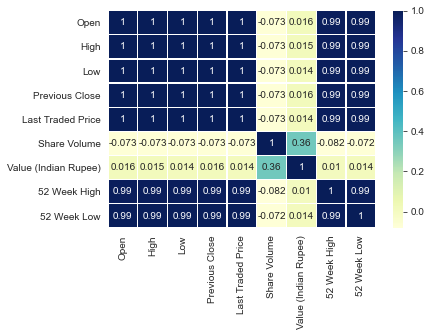

In [19]:
sns.heatmap(data.corr(),annot=True,cmap='YlGnBu',linewidths=0.2)

In [20]:
#Data Cleaning
#Checking for Not available value(NULL/NA)

In [21]:
data.isna().any()

Company Name                 False
Symbol                       False
Industry                     False
Series                       False
Open                         False
High                         False
Low                          False
Previous Close               False
Last Traded Price            False
Change                       False
Percentage Change            False
Share Volume                 False
Value (Indian Rupee)         False
52 Week High                 False
52 Week Low                  False
365 Day Percentage Change    False
30 Day Percentage Change     False
dtype: bool

<AxesSubplot:>

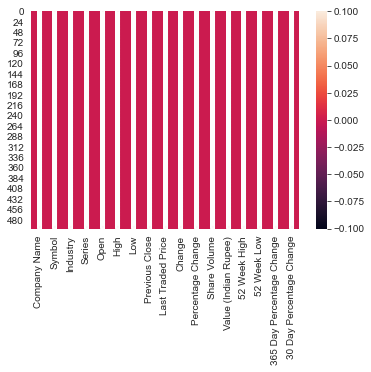

In [22]:
sns.heatmap(data.isna(),annot=True)

In [23]:
#There is no null values in the dataset

#Getting unique values

In [24]:
data.nunique()

Company Name                 501
Symbol                       501
Industry                      21
Series                         2
Open                         492
High                         495
Low                          493
Previous Close               495
Last Traded Price            493
Change                       372
Percentage Change            354
Share Volume                 501
Value (Indian Rupee)         501
52 Week High                 497
52 Week Low                  494
365 Day Percentage Change    441
30 Day Percentage Change     458
dtype: int64

In [25]:
#Droping Symbol and Series Columns

data.drop(columns=['Symbol','Series'],inplace=True)
data.columns

Index(['Company Name', 'Industry', 'Open', 'High', 'Low', 'Previous Close',
       'Last Traded Price', 'Change', 'Percentage Change', 'Share Volume',
       'Value (Indian Rupee)', '52 Week High', '52 Week Low',
       '365 Day Percentage Change', '30 Day Percentage Change'],
      dtype='object')

In [26]:
#Data Visualization
#In this phase,we will witness a lot of line graphs which can help us to understand the trend

#Analysing High vs Low

Text(0.5, 1.0, 'High vs Low')

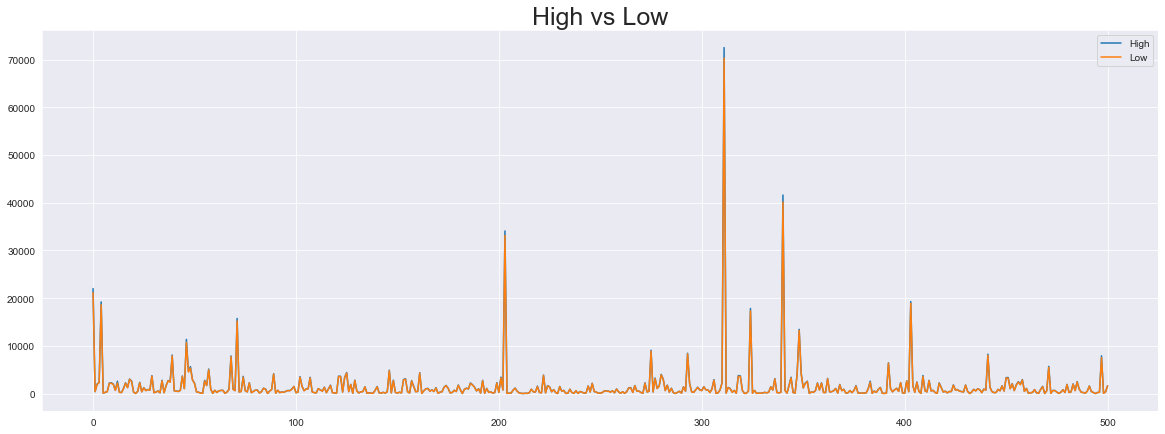

In [27]:
fx = data[['High','Low']].plot(figsize=(20,7))
fx.set_title("High vs Low",fontsize=25)

Text(0.5, 1.0, 'Open Vs Previous Close')

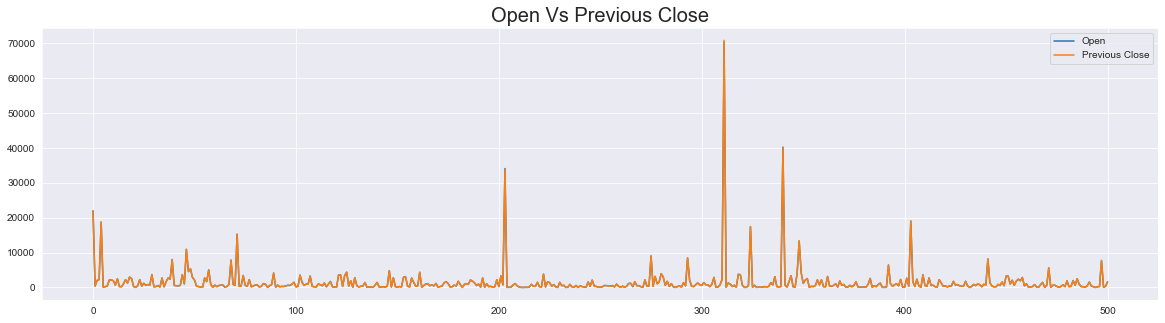

In [28]:
#Analysing Closing price vs Open Price

fx = data[['Open','Previous Close']].plot(figsize=(20,5))
fx.set_title("Open Vs Previous Close",fontsize=20)

Text(0.5, 1.0, 'Open Vs Previous Close')

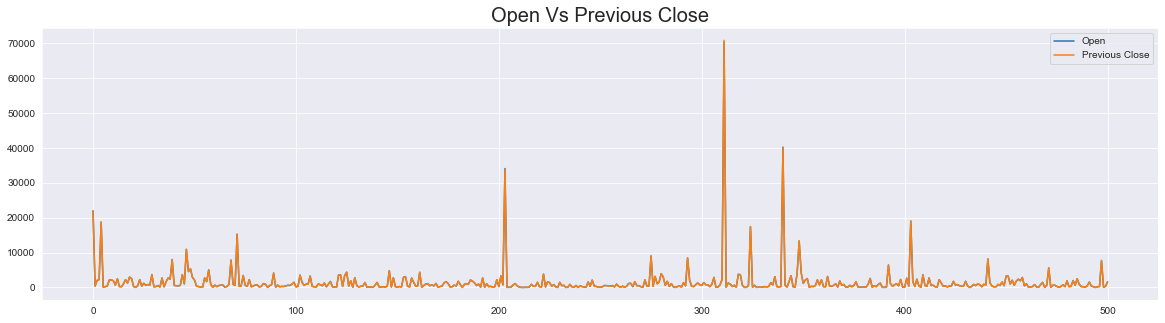

In [29]:
#Analysing Closing price vs Open Price

fx = data[['Open','Previous Close']].plot(figsize=(20,5))
fx.set_title("Open Vs Previous Close",fontsize=20)

In [30]:
#Distribution of Stock Measures

#Let witness the histogram distribution of the stock measures such as open,close,high,low and volume

Skewness of each measures
{'Open': 10.0834494701177, 'High': 10.202033718688162, 'Previous Close': 10.146385305666179, 'Low': 10.201970935326168, 'Share Volume': 8.938483021288945}


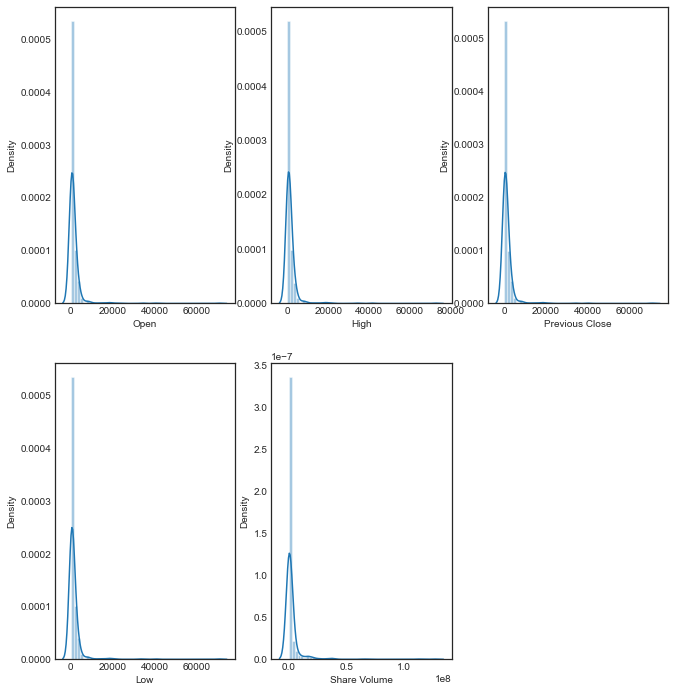

In [31]:
columns = ['Open','High','Previous Close','Low','Share Volume']
di = {}
plt.figure(figsize=(20,7))
plt.style.use('seaborn-white')
d_x = 231
for i in columns:
    plt.subplot(d_x)
    sns.distplot(data[i])
    a_x = plt.gcf()
    a_x.set_size_inches(11,12)
    d_x+=1
    di[i] = data[i].skew()
print("Skewness of each measures")
print(di)

In [32]:
#Insights:

#All the measures are exhibit equal distribution property
#All the Distributions are positivly Skewed

<AxesSubplot:>

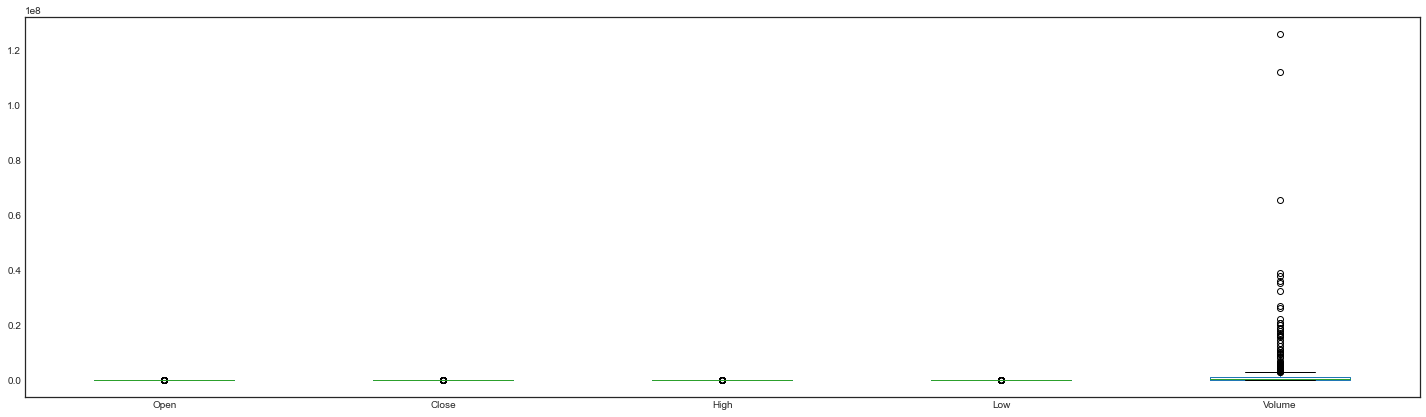

In [33]:
#Box Plot of Features

df = pd.DataFrame({'Open':data['Open'],'Close':data['Previous Close'],'High':data['High'],'Low':data['Low'],'Volume':data['Share Volume']})
df.plot.box(figsize=(25,7))

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>], dtype=object)

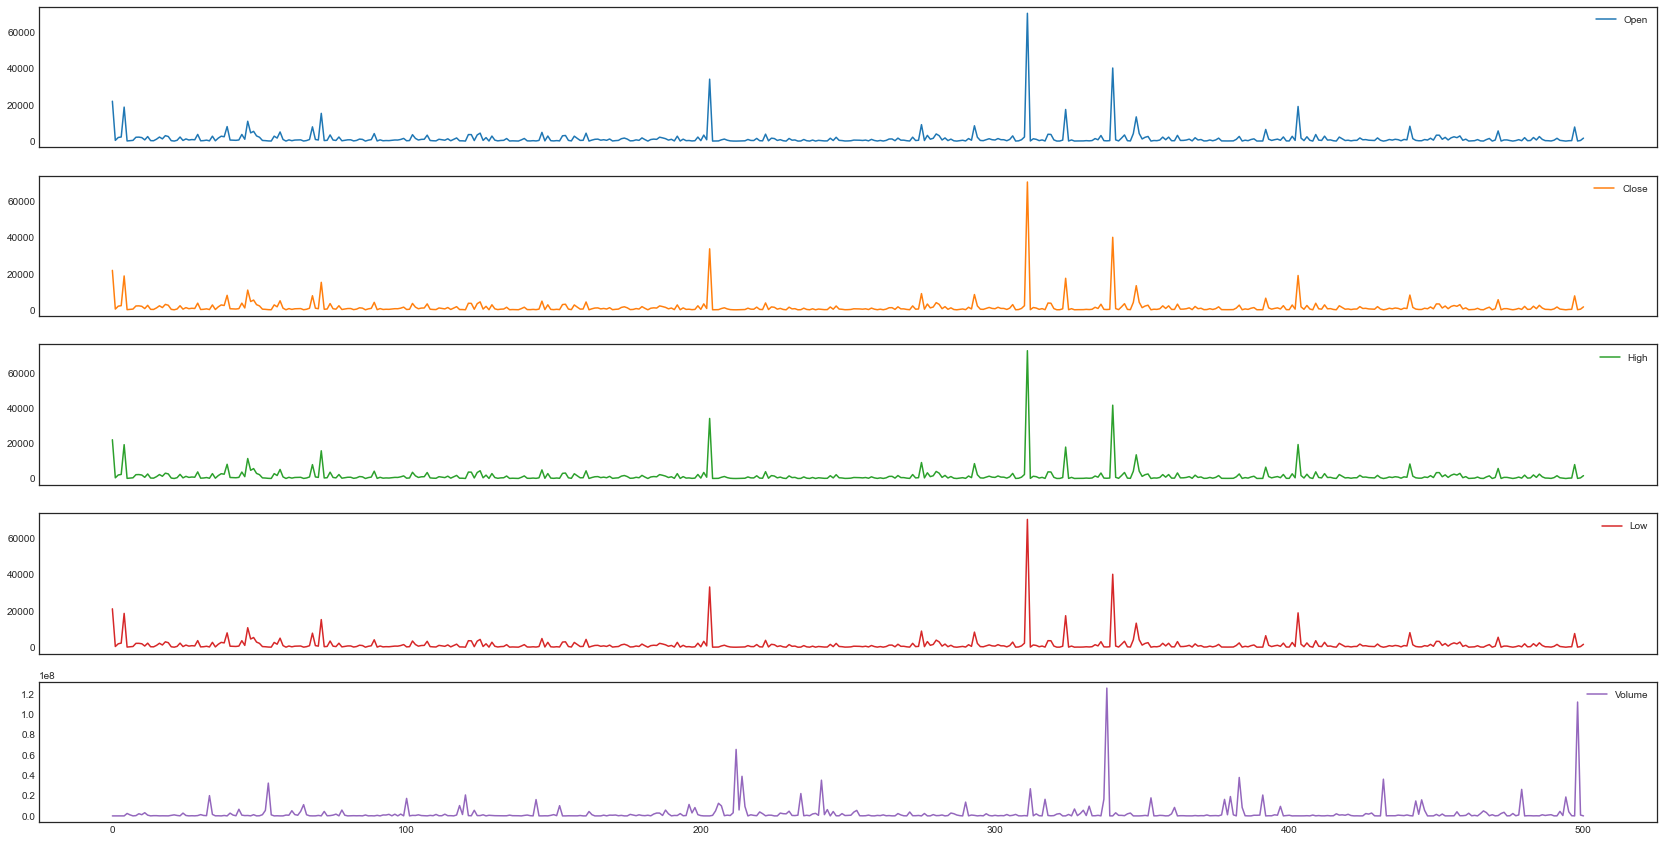

In [34]:
df.plot(subplots=True,figsize=(29,15))

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]),
 [Text(0, 0, 'Diversified'),
  Text(1, 0, 'Healthcare'),
  Text(2, 0, 'Financial Services'),
  Text(3, 0, 'Capital Goods'),
  Text(4, 0, 'Consumer Services'),
  Text(5, 0, 'Construction Materials'),
  Text(6, 0, 'Metals & Mining'),
  Text(7, 0, 'Power'),
  Text(8, 0, 'Services'),
  Text(9, 0, 'Fast Moving Consumer Goods'),
  Text(10, 0, 'Oil Gas & Consumable Fuels'),
  Text(11, 0, 'Information Technology'),
  Text(12, 0, 'Chemicals'),
  Text(13, 0, 'Textiles'),
  Text(14, 0, 'Automobile and Auto Components'),
  Text(15, 0, 'Consumer Durables'),
  Text(16, 0, 'Telecommunication'),
  Text(17, 0, 'Realty'),
  Text(18, 0, 'Forest Materials'),
  Text(19, 0, 'Construction'),
  Text(20, 0, 'Media Entertainment & Publication')])

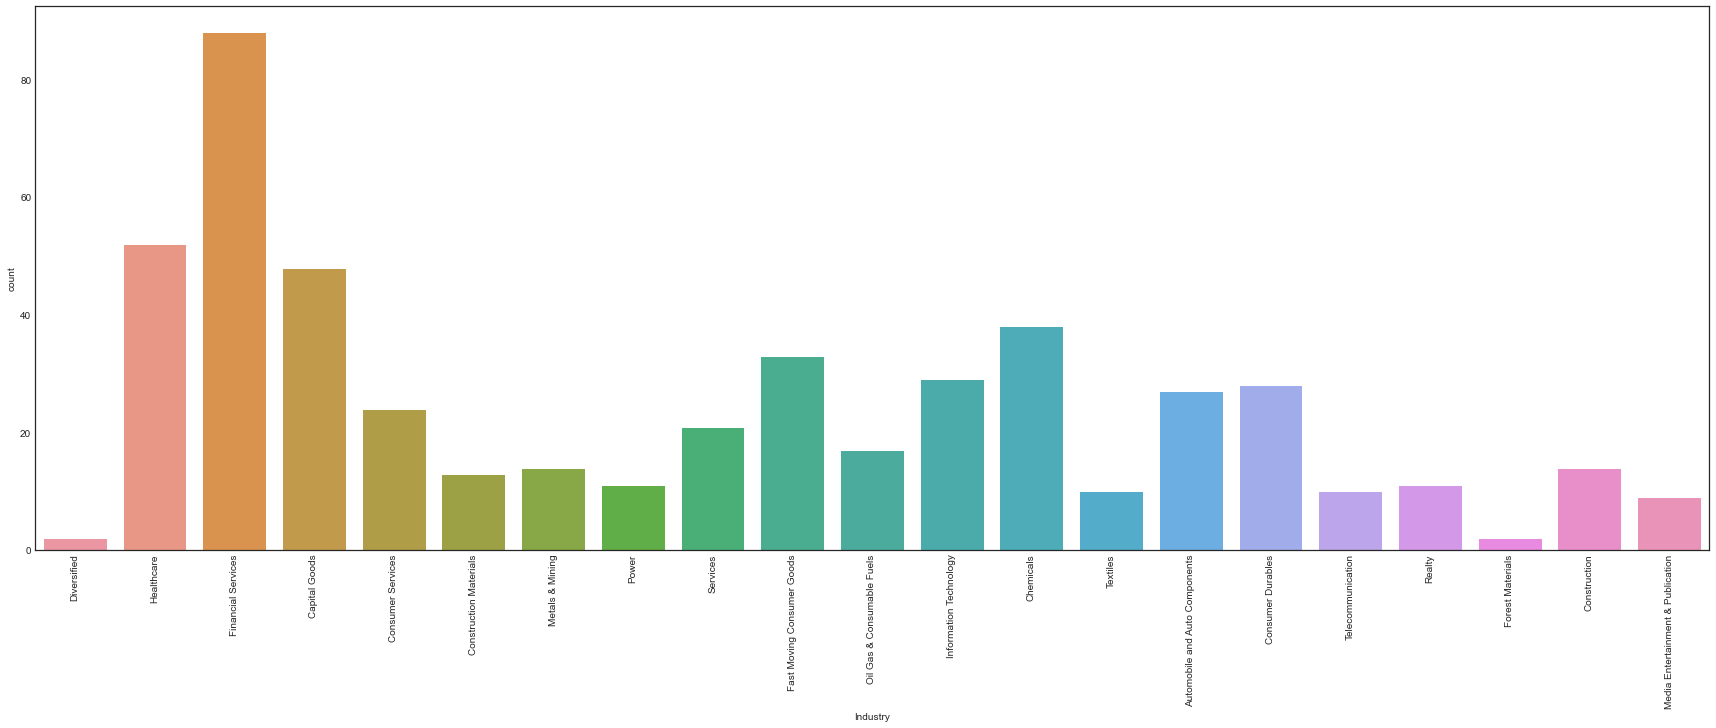

In [35]:
#Distribution of Industries

plt.figure(figsize=(30,10))
sns.countplot(data['Industry'])
plt.xticks(rotation=90)

In [36]:
#Observations

#Financial Services Contributes more value counts
#Forest Materials and Diversified are having low value counts

In [37]:
data['Industry'].value_counts()

Financial Services                   88
Healthcare                           52
Capital Goods                        48
Chemicals                            38
Fast Moving Consumer Goods           33
Information Technology               29
Consumer Durables                    28
Automobile and Auto Components       27
Consumer Services                    24
Services                             21
Oil Gas & Consumable Fuels           17
Metals & Mining                      14
Construction                         14
Construction Materials               13
Power                                11
Realty                               11
Telecommunication                    10
Textiles                             10
Media Entertainment & Publication     9
Forest Materials                      2
Diversified                           2
Name: Industry, dtype: int64